# Simple Lineal Regression

In [18]:
# In first place, we have to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will create a fictitious dataset for our firsts steps in the Lineal Regression

In [2]:
n = 500
X = np.linspace(-2, 3, n)
# X is an array with 500 numbers that are between -2 and 3.
y_real = 3*X -2
# y_real is another array with 500 numbers.

y = y_real + np.random.randn(n)
# y, of course, have to be an array
# np.random.randn(n) returns an array with n random numbers with a Normal Distribution
# With this, we are agreggating some noise in the function y_real

# All this, are operations between arrays. Therefore the results are arrays.

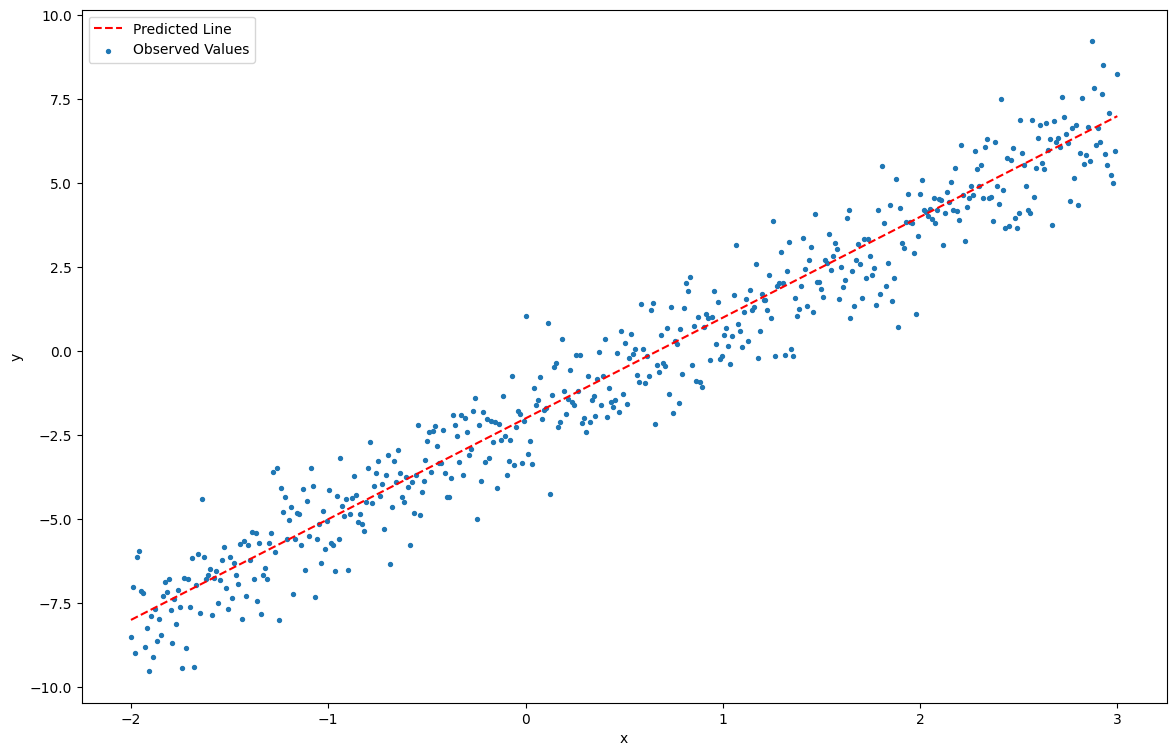

In [3]:
# Graphing
plt.figure(figsize=(14,9))
plt.plot(X, y_real, '--' , label= 'Predicted Line', c = 'r')
plt.scatter(X, y, s=8, label='Observed Values')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Following with the theme, we have to calculate manually the formula of the Lineal regression:



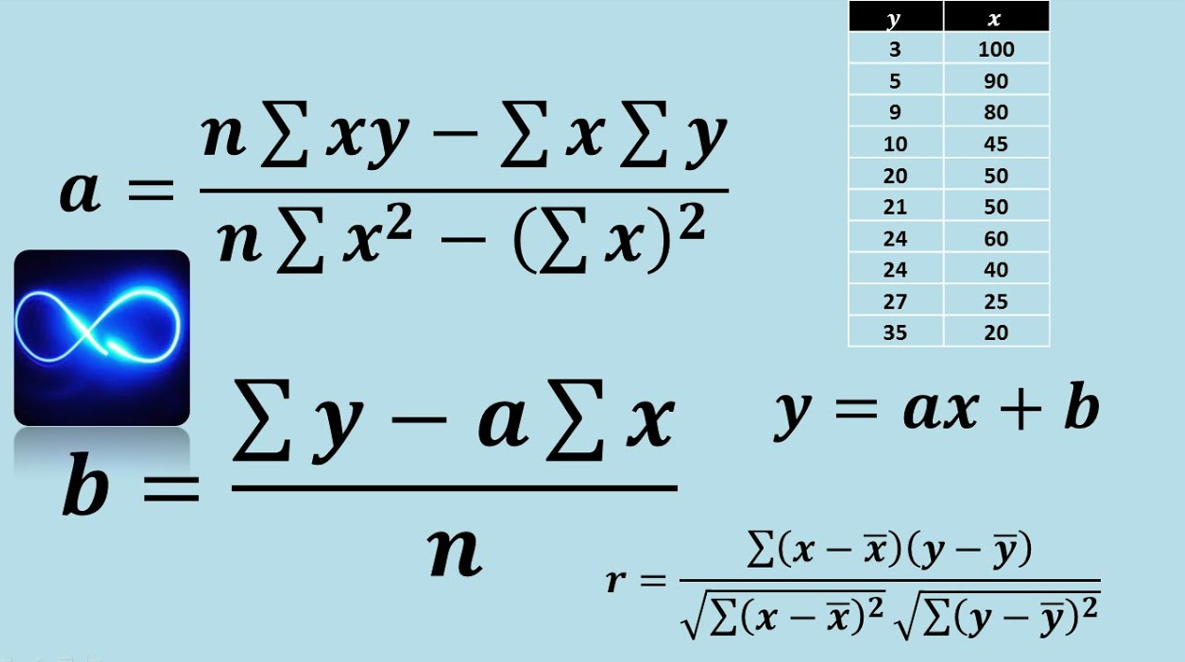

#### ` y = ax + b `
n: sample size

a: slope

b: intercept with 'x' axis

In [4]:
# We'll calculate 'a'
## Way 1:
a_way1 = ((n * sum(X*y)) - (sum(X) * sum(y))) / ((n * sum(X**2)) - ((sum(X))**2))
## Way 2:
a_way2 = ((n * (X*y).sum()) - (X.sum() * y.sum())) / ((n * (X**2).sum()) - (X.sum())**2)
## Verifying:
a_way2 == a_way1
## Then, 'a' is equal to...
a = a_way1
print ('The slope, manually calculated,is:', a)

The slope, manually calculated,is: 2.9643511307059187


In [5]:
# We'll calculate 'b'
b = (y.sum() - a * X.sum()) / n
print('The intercept with "x" axis, manually calculated, is:', b)

The intercept with "x" axis, manually calculated, is: -2.0964465366960776


Now, we have to use Sckit-Learn

In [17]:
from sklearn.linear_model import LinearRegression
# Here, we are importing the module that contain the algoritm of Lineal Regression.

In [7]:
linear_model = LinearRegression()
# We instantiate an object of the class LinearRegression
# We are creating our predictive model 'linear_model'
# If we don't specify the parameters inside LinearRegression(), sklearn will give us the default parameters

In [8]:
print(X.ndim) # Is an array with just one dimension
print(X.reshape(-1,1)) # Why we made this step before train the model?

1
[[-2.        ]
 [-1.98997996]
 [-1.97995992]
 [-1.96993988]
 [-1.95991984]
 [-1.9498998 ]
 [-1.93987976]
 [-1.92985972]
 [-1.91983968]
 [-1.90981964]
 [-1.8997996 ]
 [-1.88977956]
 [-1.87975952]
 [-1.86973948]
 [-1.85971944]
 [-1.8496994 ]
 [-1.83967936]
 [-1.82965932]
 [-1.81963928]
 [-1.80961924]
 [-1.7995992 ]
 [-1.78957916]
 [-1.77955912]
 [-1.76953908]
 [-1.75951904]
 [-1.749499  ]
 [-1.73947896]
 [-1.72945892]
 [-1.71943888]
 [-1.70941884]
 [-1.6993988 ]
 [-1.68937876]
 [-1.67935872]
 [-1.66933868]
 [-1.65931864]
 [-1.6492986 ]
 [-1.63927856]
 [-1.62925852]
 [-1.61923848]
 [-1.60921844]
 [-1.5991984 ]
 [-1.58917836]
 [-1.57915832]
 [-1.56913828]
 [-1.55911824]
 [-1.5490982 ]
 [-1.53907816]
 [-1.52905812]
 [-1.51903808]
 [-1.50901804]
 [-1.498998  ]
 [-1.48897796]
 [-1.47895792]
 [-1.46893788]
 [-1.45891784]
 [-1.4488978 ]
 [-1.43887776]
 [-1.42885772]
 [-1.41883768]
 [-1.40881764]
 [-1.3987976 ]
 [-1.38877756]
 [-1.37875752]
 [-1.36873747]
 [-1.35871743]
 [-1.34869739]
 [-1.338

If you don't reshape the X array, the **fit()** will return *ValueError*, it means, SckitLearn won't read the values properly.

This:
*linear_model.fit(X, y)*

Return this:

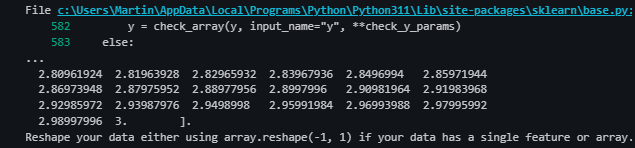

The correct form is:

In [9]:
# Training model with fit()
linear_model.fit(X.reshape(-1,1), y)

LinearRegression()

Here, our model has learned from the data starting from the *slope* and from the *intercept with 'x' axis*:

In [10]:
print ('The slope, calculated with Sklearn, is:', linear_model.coef_)
print('The intercept with "x" axis, calculated with Sklearn, is:', linear_model.intercept_)

The slope, calculated with Sklearn, is: [2.96435113]
The intercept with "x" axis, calculated with Sklearn, is: -2.0964465366960767


Once these parameters have been calculated and the model has been trained, we'll proceed to make a **train_test_split**.

This method separates our dataset into two **subsets**, one for *training* and the other for *testing* 

The Train should contains most of the data, 70 percent and the Test should contain the rest of data.  

In [11]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1) # Correction to avoid ValueErrors, we saw it previously.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(350, 1) (350,) (150, 1) (150,)


Out of the 500 data points we had, we have to use 350 (70%) for *training* and 150 for *testing*.

Again...

In [12]:
# Training model
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the Out labels 'y' in the training subset and in the testing subset.
y_train_pred = linear_model.predict(X_train) # training subset
y_test_pred = linear_model.predict(X_test) # testing subset

In [14]:
# Here, we will see how the model has learned from the data, starting from the slope and the intercept.
print('La pendiente es :', linear_model.coef_)
print('La ordenada al origen es:', linear_model.intercept_)

La pendiente es : [2.9580535]
La ordenada al origen es: -2.0772006352919394


The models designed to regression problems try to find the curve that better aproximate the data. The models made this, through the minimization of errors that are determined between the *predicted values* ($\hat{y}$) and the *observed values* ($y$), **y_real** and **y** respectively.

Here, we wiil see the curve that this model calculated:

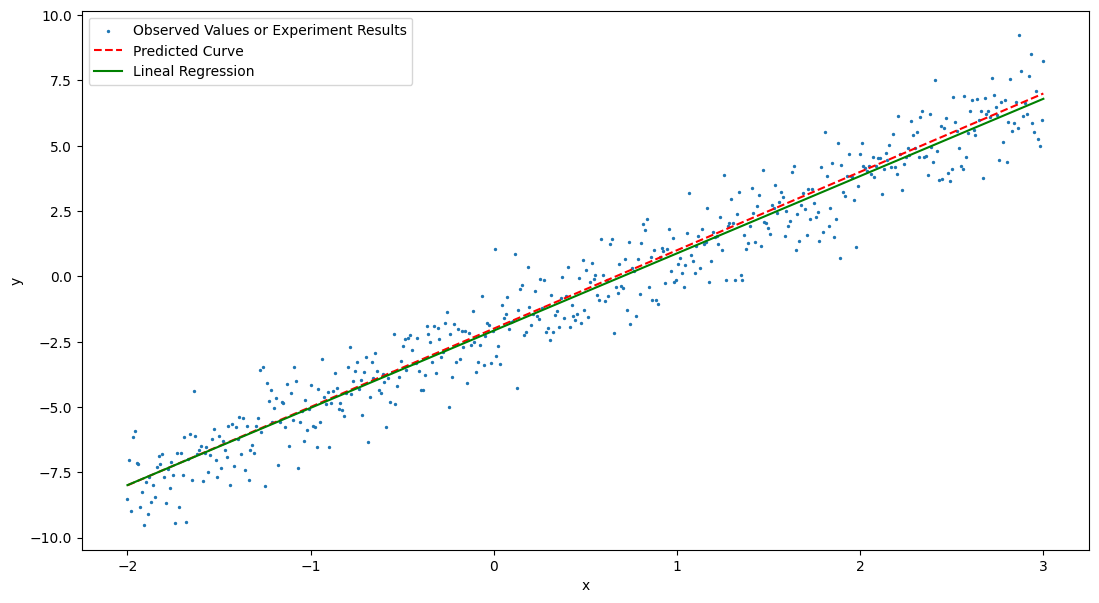

In [23]:
plt.figure(figsize = (13,7))

plt.scatter(X,y, s = 2, label="Observed Values or Experiment Results")
plt.plot(X, y_real, '--',label ='Predicted Curve', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Lineal Regression', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

#### We can see that our model could reproduce the Predicted Line fairly accurately.

# Evaluation of the model

In this step, we will evaluate the models that intanciate and use previously for predicting. 

Evaluate a model means **cuantify his performance** and determine the quality of the predictions. This evaluation is related directly with the **ERROR** between the real label *Y* and the prediction *Y'*.

In some cases, the model **overestimate** the prediction value, then the error will be positive. I.E, if the real value is 5 and the model predict a 6, the error will be **+1**.

In other cases, the model **underestimate** the prediction value and the error will be negative. I.E, if the real value is 5 and the model predict a 4, the error will be **-1**.

We'll see now, some **METRICS** for evaluate our models: MAE, MSE and RMSE.

For us:
- $\hat{y}$ --> *predicted values* --> **y_real** 
- $y$ --> *observed values* --> **y**


### - MAE (Mean Absolute Error)

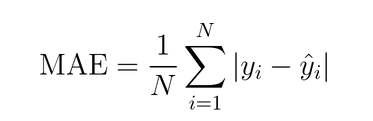

Calculated manually

In [29]:
mae_manually = sum(abs(y-y_real))/n

0.7947575347010823

Calculated with sklearn

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [36]:
mae_sklearn_train= mean_absolute_error(y_true= y_train, y_pred= y_train_pred)
mae_sklearn_test = mean_absolute_error(y_true= y_test, y_pred= y_test_pred)
print(mae_sklearn_train,mae_sklearn_test)

0.7858857380127675 0.8068855205352586


In [48]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### - MSE (Mean Squared Error)
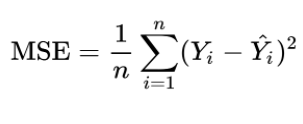

Calculated manually

Calculated with sklearn

### - RMSE (Root Mean Squared Error)

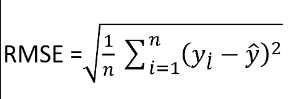

Calculated manually

Calculated with sklearn

### -Determination coeficient (R squared)
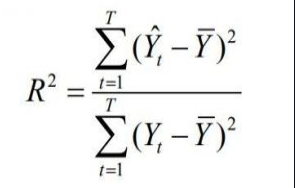